In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import pickle #store model
import scipy
from hyperopt import fmin, tpe, hp, partial,space_eval,rand,Trials,STATUS_OK
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import importlib #python 3.x use reload by #importlib.reload()

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15.0,10.0) #figure size

## Import files

In [2]:
df = pd.read_csv('z_scaled.csv')

In [3]:
# to create feature importance
feature_names=pd.read_csv('final_rfe.csv') # created in Feature Selection
feature_names=feature_names.feature
feature_names=feature_names[:40]
feature_names.head(5)

0    fulladdress_count_30
1        address_count_30
2         address_count_7
3     fulladdress_count_7
4     fulladdress_count_3
Name: feature, dtype: object

## Show z_scaled file features

In [4]:
df.head(5)

,Unnamed: 0,fulladdress_count_30,address_count_30,address_count_7,fulladdress_count_7,fulladdress_count_3,address_count_3,fulladdress_count_0_by_30,address_count_0_by_30,address_count_0_by_7,...,fulladdress_homephone_count_0_by_30,fulladdress_homephone_count_7,name_dob_count_0_by_14,name_dob_count_7,ssn_firstname_count_0_by_14,ssn_count_0_by_30,ssn_firstname_count_7,homephone_count_7,homephone_count_3,fraud_label
0,0,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
1,1,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,1
2,2,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
3,3,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
4,4,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0


<font color=red>unnamed:0 column was created automatically due to to_csv function in z_scaled file </font>

In [5]:
df.drop(df.columns[0],axis=1,inplace=True) # drop column unnamed:0 to make this dataframe more pretty and efficient
df.head(5) # show the current dataframe

,fulladdress_count_30,address_count_30,address_count_7,fulladdress_count_7,fulladdress_count_3,address_count_3,fulladdress_count_0_by_30,address_count_0_by_30,address_count_0_by_7,fulladdress_count_0_by_7,...,fulladdress_homephone_count_0_by_30,fulladdress_homephone_count_7,name_dob_count_0_by_14,name_dob_count_7,ssn_firstname_count_0_by_14,ssn_count_0_by_30,ssn_firstname_count_7,homephone_count_7,homephone_count_3,fraud_label
0,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
1,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,1
2,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
3,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0
4,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454,0


In [6]:
df.shape

(1000000, 41)

## split label and varables

In [7]:
label=df.fraud_label
label.shape

(1000000,)

## split statistics to about 80% train, test set (X, y will be divided by train_test_split function) and 20% Out Of Time (OOT)

The OOT performance is what we can expect when we implement the model, thus try to maximize it with minimal model complexity.

In [8]:
X=df.drop(columns=['fraud_label'])
X=X[0:833508]
X

,fulladdress_count_30,address_count_30,address_count_7,fulladdress_count_7,fulladdress_count_3,address_count_3,fulladdress_count_0_by_30,address_count_0_by_30,address_count_0_by_7,fulladdress_count_0_by_7,...,name_dob_count_0_by_30,fulladdress_homephone_count_0_by_30,fulladdress_homephone_count_7,name_dob_count_0_by_14,name_dob_count_7,ssn_firstname_count_0_by_14,ssn_count_0_by_30,ssn_firstname_count_7,homephone_count_7,homephone_count_3
0,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
1,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
2,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
3,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
4,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833503,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,1.703824,0.639148
833504,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,-0.769214,-0.521454
833505,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,1.703824,1.799751
833506,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.19994,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.17291,-0.057185,1.703824,0.639148


In [9]:
y=label[0:833508]
y

0         0
1         1
2         0
3         0
4         0
         ..
833503    0
833504    0
833505    0
833506    0
833507    0
Name: fraud_label, Length: 833508, dtype: int64

In [10]:
oot=df.drop(columns=['fraud_label'])
oot=oot[833508:]
oot_label=label[833508:]
display(oot.shape)
display(oot)

(166492, 40)

,fulladdress_count_30,address_count_30,address_count_7,fulladdress_count_7,fulladdress_count_3,address_count_3,fulladdress_count_0_by_30,address_count_0_by_30,address_count_0_by_7,fulladdress_count_0_by_7,...,name_dob_count_0_by_30,fulladdress_homephone_count_0_by_30,fulladdress_homephone_count_7,name_dob_count_0_by_14,name_dob_count_7,ssn_firstname_count_0_by_14,ssn_count_0_by_30,ssn_firstname_count_7,homephone_count_7,homephone_count_3
833508,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,-0.769214,-0.521454
833509,1.475749,1.388044,-0.072633,-0.067094,-0.057932,-0.060819,-5.118381,-4.485421,0.114765,0.102312,...,-5.727965,-5.622803,-0.057263,-7.717239,-0.055801,-7.441336,-5.404012,-0.057185,0.879478,-0.521454
833510,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,-0.769214,-0.521454
833511,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,-0.769214,-0.521454
833512,1.475749,1.388044,1.634579,1.653409,-0.057932,-0.060819,-5.118381,-4.485421,-7.611145,-8.418760,...,-5.727965,-5.622803,2.121111,-7.717239,2.160208,-7.441336,-5.404012,2.155608,0.879478,0.639148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,-0.769214,-0.521454
999996,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,0.055132,0.639148
999997,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,0.055132,0.639148
999998,-0.101958,-0.117706,-0.072633,-0.067094,-0.057932,-0.060819,0.179774,0.199940,0.114765,0.102312,...,0.163303,0.166392,-0.057263,0.118316,-0.055801,0.123528,0.172910,-0.057185,1.703824,0.639148


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### During process, we are always encouraged to ask advices from the prefession.

Professor Stephen Coggeshall's suggestion of the GBDT model:  
max_depth=10  
n_estimators=100  
learning_rate=0.05  
subsample=0.5

## Optimization by Hyperopt

In order to get the best model, parameters need to be adjusted. Here hyperopt will be used instead of manual.  

Hyperopt is a class library for "distributed asynchronous algorithm configuration/ hyperparameter optimization" in Python. Using it, we can rely on the complicated hyperparameter optimization process to automatically obtain the best hyperparameters.

In [23]:
# define a function to get the model and its auc
# auc is one of the model measures of goodness
def GBM(argsDict):
    max_depth = argsDict["max_depth"]
    n_estimators = argsDict['n_estimators']
    learning_rate = argsDict["learning_rate"]
    subsample = argsDict["subsample"] 

    global X_train,y_train

    gbm = GradientBoostingClassifier(max_depth=max_depth,  
                                     n_estimators=n_estimators,   
                                     learning_rate=learning_rate,
                                     subsample=subsample)     

    metric = cross_val_score(gbm,X_train,y_train,cv=5,scoring="roc_auc").mean()
    print(metric)
    return -metric

In [60]:
# define a space where Hyperopt could choose parameters by hp.choice() function
space = {"max_depth":hp.choice('max_depth',[5,6,10]),        
         "n_estimators":hp.choice('n_estimators',[100,500,800]),  
         "learning_rate":hp.choice('learning_rate',[0.02,0.05]),  
         "subsample":hp.choice('subsample',[0.1,0.5])         
        }

In [71]:
algo = partial(tpe.suggest,n_startup_jobs=1) 
best = fmin(GBM,space,algo=algo,max_evals=50) # cause there are total 36 choices in above space, I tried 50 evaluations

0.7794797889864656                                                                                                     
0.7760984847428913                                                                                                     
0.7856152974410314                                                                                                     
0.787399899965436                                                                                                      
0.7874511181874577                                                                                                     
0.7879317060871929                                                                                                     
0.787515611178465                                                                                                      
0.7878479762960577                                                                                                     
0.7880356467114061                      

In [72]:
print(best)
print(GBM(best))

{'learning_rate': 0, 'max_depth': 2, 'n_estimators': 0, 'subsample': 1}
nan
nan


hp.choice() returns the index

In [49]:
param={'max_depth':6,'n_estimators':1000,'learning_rate':0.02,'subsample':0.5}

In [13]:
from sklearn import tree
import pydotplus 
import seaborn # pictures drew by seaborn are sooooooo pretty!!!

In [14]:
niter = 0 #number of iteration
niter_max = 3 #maximum number of iteration
#create null dataframes to store FDR,KS,AUC,THR in each iteration
#these are all model measures of goodness
FDR = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot'])
KS = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot'])
AUC = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot'])
THR = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #thresholds
ACC = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #accuracy
MIS = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #misclassification
FPR = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #false positive rate
TPR = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #true positive rate/ sensitivity/recall
TNR = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #true negative rate/specificity
PRE = pd.DataFrame(np.zeros((niter_max,3)),columns=['train','test','oot']) #precision
Color=(['#CD5555','#00CED1','#FFDAB9'])

By setting the best parameters of Gradient Boosting model, a model like this can be built:

'Confusion Matrix for train set iteration 0 :'

,Predicted Good,Predicted Bad
Actual Good,656913,306
Actual Bad,4634,4953


'Confusion Matrix for test set iteration 0 :'

,Predicted Good,Predicted Bad
Actual Good,164093,189
Actual Bad,1298,1122


'Confusion Matrix for oot set iteration 0 :'

,Predicted Good,Predicted Bad
Actual Good,163873,233
Actual Bad,1297,1089


first GBDT Tree of iteration 0


'Confusion Matrix for train set iteration 1 :'

,Predicted Good,Predicted Bad
Actual Good,656845,311
Actual Bad,4703,4947


'Confusion Matrix for test set iteration 1 :'

,Predicted Good,Predicted Bad
Actual Good,164135,210
Actual Bad,1240,1117


'Confusion Matrix for oot set iteration 1 :'

,Predicted Good,Predicted Bad
Actual Good,163901,205
Actual Bad,1328,1058


first GBDT Tree of iteration 1


'Confusion Matrix for train set iteration 2 :'

,Predicted Good,Predicted Bad
Actual Good,656894,330
Actual Bad,4673,4909


'Confusion Matrix for test set iteration 2 :'

,Predicted Good,Predicted Bad
Actual Good,164099,178
Actual Bad,1271,1154


'Confusion Matrix for oot set iteration 2 :'

,Predicted Good,Predicted Bad
Actual Good,163837,269
Actual Bad,1303,1083


first GBDT Tree of iteration 2


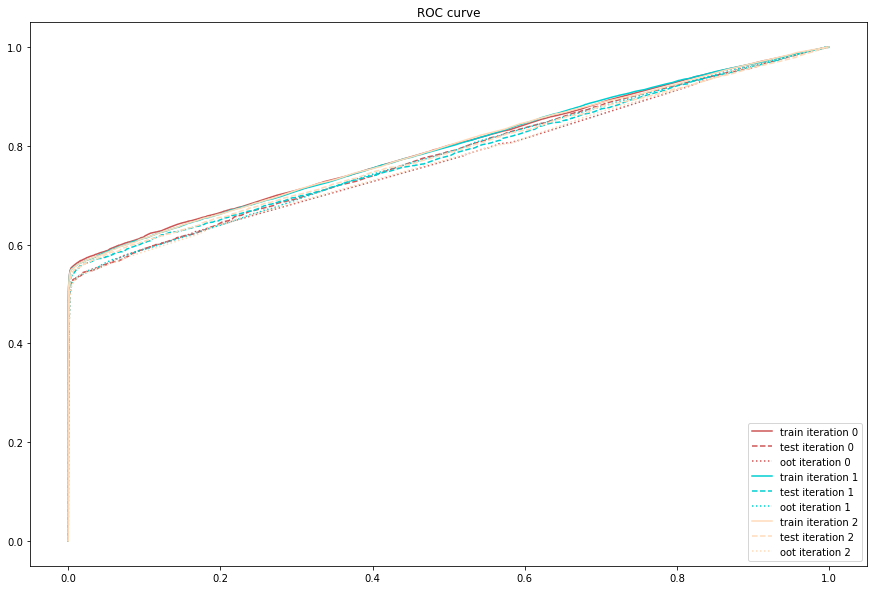

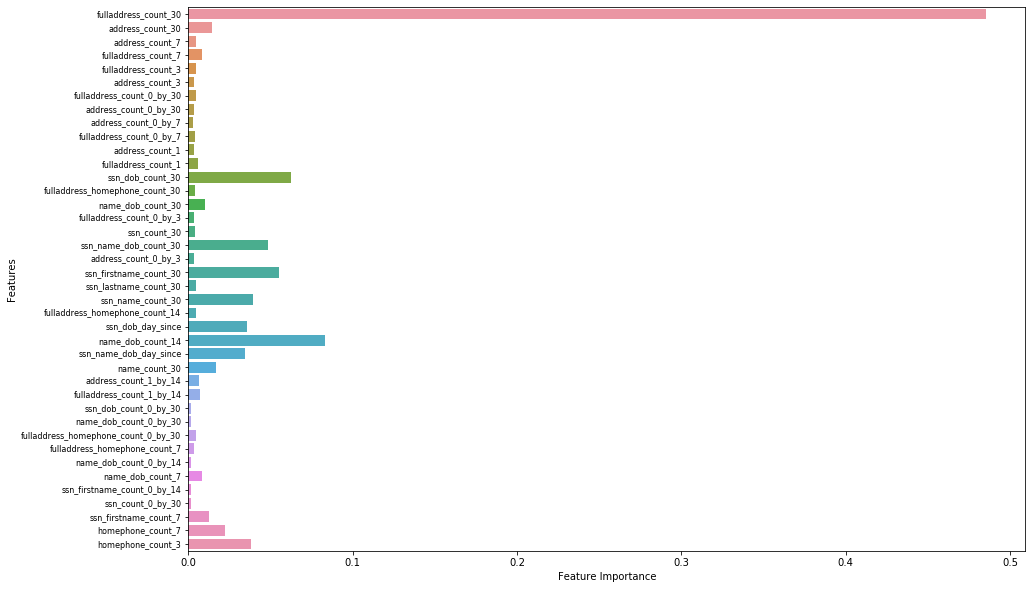

In [50]:
for niter in range(niter_max):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    GBDT = GradientBoostingClassifier(max_depth= param['max_depth'],
                                      learning_rate=param['learning_rate'],
                                      n_estimators= param['n_estimators'],
                                      subsample= param['subsample']).fit(X_train,y_train)
    
    prediction_train = GBDT.predict_proba(X_train)
    #Predict class probabilities for X. array with two columns,fraud=0 & fraud=1, choose fraud 1
    prediction_train = prediction_train[:,1]
    pre_train=GBDT.predict(X_train)

    prediction_test = GBDT.predict_proba(X_test)
    prediction_test = prediction_test[:,1]
    pre_test=GBDT.predict(X_test)
    
    prediction_oot = GBDT.predict_proba(oot)
    prediction_oot = prediction_oot[:,1]
    pre_oot=GBDT.predict(oot)
    X_train_copy = X_train.copy()
    X_test_copy=X_test.copy()
    oot_copy=oot.copy()
    
    #FDR
    X_train_copy['prediction'] = prediction_train
    X_train_copy['fraud label'] = y_train
    top_rows = int(round(X_train_copy.shape[0]*0.03)) #top 30%
    sorted_top_rows = X_train_copy.sort_values('prediction',ascending = False).head(top_rows)
    fdr_train = sum(sorted_top_rows['fraud label'][:])/sum(X_train_copy['fraud label'][:])
    FDR['train'][niter] = fdr_train
                                                              
    X_test_copy['prediction'] = prediction_test
    X_test_copy['fraud label'] = y_test
    top_rows = int(round(X_train_copy.shape[0]*0.03)) #top 30%
    sorted_top_rows = X_test_copy.sort_values('prediction',ascending = False).head(top_rows)
    fdr_test = sum(sorted_top_rows['fraud label'])/sum(X_test_copy['fraud label'])
    FDR['test'][niter] = fdr_test
    
    oot_copy['prediction'] = prediction_oot
    oot_copy['fraud label'] = oot_label
    top_rows = int(round(oot.shape[0]*0.03)) #top 30%
    sorted_top_rows = oot_copy.sort_values('prediction',ascending = False).head(top_rows)
    fdr_oot = sum(sorted_top_rows['fraud label'])/sum(oot_copy['fraud label'])
    FDR['oot'][niter] = fdr_oot
    
    #Confusion Matrix
    #train
    tn, fp, fn, tp = confusion_matrix(y_train, pre_train).ravel()
    CM_train=pd.DataFrame(np.zeros((2,2)),index=['Actual Good','Actual Bad'],columns=['Predicted Good','Predicted Bad'])
    CM_train.loc[:,:]=([tn,fp],[fn,tp])
    display('Confusion Matrix for train set iteration %d :'%(niter),CM_train)
    ACC['train'][niter]=(tp+tn)/(tp+tn+fp+fn)
    MIS['train'][niter]=(fp+fn)/(tp+tn+fp+fn)
    FPR['train'][niter]=fp/(fp+tn)
    TPR['train'][niter]=tp/(tp+fn)
    TNR['train'][niter]=tn/(tn+fp)
    PRE['train'][niter]=tp/(tp+fp)
    #test
    tn, fp, fn, tp = confusion_matrix(y_test, pre_test).ravel()
    CM_test=pd.DataFrame(np.zeros((2,2)),index=['Actual Good','Actual Bad'],columns=['Predicted Good','Predicted Bad'])
    CM_test.loc[:,:]=([tn,fp],[fn,tp])
    display('Confusion Matrix for test set iteration %d :'%(niter),CM_test)
    ACC['test'][niter]=(tp+tn)/(tp+tn+fp+fn)
    MIS['test'][niter]=(fp+fn)/(tp+tn+fp+fn)
    FPR['test'][niter]=fp/(fp+tn)
    TPR['test'][niter]=tp/(tp+fn)
    TNR['test'][niter]=tn/(tn+fp)
    PRE['test'][niter]=tp/(tp+fp)
    #oot
    tn, fp, fn, tp = confusion_matrix(oot_label, pre_oot).ravel()
    CM_oot=pd.DataFrame(np.zeros((2,2)),index=['Actual Good','Actual Bad'],columns=['Predicted Good','Predicted Bad'])
    CM_oot.loc[:,:]=([tn,fp],[fn,tp])
    display('Confusion Matrix for oot set iteration %d :'%(niter),CM_oot)
    ACC['oot'][niter]=(tp+tn)/(tp+tn+fp+fn)
    MIS['oot'][niter]=(fp+fn)/(tp+tn+fp+fn)
    FPR['oot'][niter]=fp/(fp+tn)
    TPR['oot'][niter]=tp/(tp+fn)
    TNR['oot'][niter]=tn/(tn+fp)
    PRE['oot'][niter]=tp/(tp+fp)
    
    #ROC/AUC
    #calculate fpr,tpr,thresholds
    fpr_train,tpr_train,thresholds_train = roc_curve(y_train,prediction_train)
    fpr_test,tpr_test,thresholds_test = roc_curve(y_test,prediction_test)
    fpr_oot, tpr_oot, thresholds_oot = roc_curve(oot_label,prediction_oot)
    #ROC curve
    plt.figure('ROC')
    plt.title('ROC curve')
    plt.plot(fpr_train,tpr_train,color=Color[niter],label='train iteration %d'%(niter),linestyle='-')
    plt.plot(fpr_test,tpr_test,color=Color[niter],label='test iteration %d'%(niter),linestyle='--')
    plt.plot(fpr_oot,tpr_oot,color=Color[niter],label='oot iteration %d'%(niter),linestyle=':')
    plt.legend(loc='lower right')
    plt.savefig('ROC_iteration_{}.png'.format(niter))
    #calculate auc
    auc_train=round(roc_auc_score(y_train,prediction_train),4)
    auc_test=round(roc_auc_score(y_test,prediction_test),4)
    auc_oot=round(roc_auc_score(oot_label,prediction_oot),4)  
    AUC['train'][niter]=auc_train
    AUC['test'][niter]=auc_test
    AUC['oot'][niter]=auc_oot
    
    #KS
    #train
    KS_max=0
    best_thr=0
    i=0
    for i in range(len(fpr_train)):
        t=tpr_train[i]
        f=fpr_train[i]
        th=thresholds_train[i]
        if (i==0):
            KS_max=t-f
            best_thr=th
        elif (t-f> KS_max):
            KS_max = t-f
            best_thr=th

    KS_max=round(KS_max,4)
    best_thr=round(best_thr,4)
    KS['train'][niter]=KS_max
    THR['train'][niter]=best_thr
    
    #test
    KS_max=0
    best_thr=0
    i=0
    for i in range(len(fpr_test)):
        t=tpr_test[i]
        f=fpr_test[i]
        th=thresholds_test[i]
        if (i==0):
            KS_max=t-f
            best_thr=th
        elif (t-f> KS_max):
            KS_max = t-f
            best_thr=th

    KS_max=round(KS_max,4)
    best_thr=round(best_thr,4)
    KS['test'][niter]=KS_max
    THR['test'][niter]=best_thr
    
    #oot
    KS_max=0
    best_thr=0
    i=0
    for i in range(len(fpr_oot)):
        t=tpr_oot[i]
        f=fpr_oot[i]
        th=thresholds_oot[i]
        if (i==0):
            KS_max=t-f
            best_thr=th
        elif (t-f> KS_max):
            KS_max = t-f
            best_thr=th

    KS_max=round(KS_max,4)
    best_thr=round(best_thr,4)
    KS['oot'][niter]=KS_max
    THR['oot'][niter]=best_thr
    
    #tree plot
    print('first GBDT Tree of iteration {}'.format(niter))
    sub_tree = GBDT.estimators_[0, 0]
    dot_data = tree.export_graphviz(
        sub_tree,
        out_file=None, filled=True,
        rounded=True,  
        special_characters=True,
        proportion=True,
        )
    graph = pydotplus.graph_from_dot_data(dot_data)  
    graph.write_png("iter_{}_tree.png".format(niter))
        
    #feature importance
    plt.figure('feat_imp')
    feat_imp=GBDT.feature_importances_
    seaborn.barplot(y=feature_names,x=feat_imp,orient='h',ci=None)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.yticks(fontsize=8)
    plt.savefig('Feature_Importance_iter_{}.png'.format(niter))

In [51]:
display('FDR',FDR,'KS',KS,'AUC',AUC,'Thresholds',THR,'Accuracy',ACC,'Misclassification',MIS,'False Positive Rate',FPR,'True Positive Rate/Sensitivity/Recall',TPR,'True Negative Rate/Specificity',TNR,'Precision',PRE)

'FDR'

,train,test,oot
0,0.571816,0.597934,0.544426
1,0.567254,0.613067,0.543168
2,0.566792,0.612784,0.543168


'KS'

,train,test,oot
0,0.5516,0.5243,0.5233
1,0.5476,0.5413,0.5235
2,0.5474,0.5415,0.5232


'AUC'

,train,test,oot
0,0.7953,0.7821,0.7733
1,0.7948,0.7827,0.7816
2,0.7944,0.7848,0.7736


'Thresholds'

,train,test,oot
0,0.0134,0.0109,0.0133
1,0.0132,0.0119,0.0109
2,0.0146,0.0160,0.0107


'Accuracy'

,train,test,oot
0,0.992592,0.991080,0.990810
1,0.992481,0.991302,0.990792
2,0.992497,0.991308,0.990558


'Misclassification'

,train,test,oot
0,0.007408,0.008920,0.009190
1,0.007519,0.008698,0.009208
2,0.007503,0.008692,0.009442


'False Positive Rate'

,train,test,oot
0,0.000466,0.001150,0.001420
1,0.000473,0.001278,0.001249
2,0.000502,0.001084,0.001639


'True Positive Rate/Sensitivity/Recall'

,train,test,oot
0,0.516637,0.463636,0.456412
1,0.512642,0.473908,0.443420
2,0.512315,0.475876,0.453898


'True Negative Rate/Specificity'

,train,test,oot
0,0.999534,0.998850,0.998580
1,0.999527,0.998722,0.998751
2,0.999498,0.998916,0.998361


'Precision'

,train,test,oot
0,0.941814,0.855835,0.823752
1,0.940852,0.841748,0.837688
2,0.937011,0.866366,0.801036


In [52]:
#calculate average as final goodness
GBDT_goodness=pd.DataFrame(np.zeros((10,3)),columns=['train','test','oot'],index=['FDR','KS','AUC','Thresholds','Accuracy','Misclassification','False Positive Rate','True Positive Rate','True Negative Rate','Precision'])
GBDT_goodness.loc['FDR']=[round(FDR["train"].mean(),4),round(FDR["test"].mean(),4),round(FDR["oot"].mean(),4)]
GBDT_goodness.loc['KS']=[round(KS["train"].mean(),4),round(KS["test"].mean(),4),round(KS["oot"].mean(),4)]
GBDT_goodness.loc['AUC']=[round(AUC["train"].mean(),4),round(AUC["test"].mean(),4),round(AUC["oot"].mean(),4)]
GBDT_goodness.loc['Thresholds']=[round(THR["train"].mean(),4),round(THR["test"].mean(),4),round(THR["oot"].mean(),4)]
GBDT_goodness.loc['Accuracy']=[round(ACC["train"].mean(),4),round(ACC["test"].mean(),4),round(ACC["oot"].mean(),4)]
GBDT_goodness.loc['Misclassification']=[round(MIS["train"].mean(),4),round(MIS["test"].mean(),4),round(MIS["oot"].mean(),4)]
GBDT_goodness.loc['False Positive Rate']=[round(FPR["train"].mean(),4),round(FPR["test"].mean(),4),round(FPR["oot"].mean(),4)]
GBDT_goodness.loc['True Positive Rate']=[round(TPR["train"].mean(),4),round(TPR["test"].mean(),4),round(TPR["oot"].mean(),4)]
GBDT_goodness.loc['True Negative Rate']=[round(TNR["train"].mean(),4),round(TNR["test"].mean(),4),round(TNR["oot"].mean(),4)]
GBDT_goodness.loc['Precision']=[round(PRE["train"].mean(),4),round(PRE["test"].mean(),4),round(PRE["oot"].mean(),4)]

display(GBDT_goodness)

,train,test,oot
FDR,0.5686,0.6079,0.5436
KS,0.5489,0.5357,0.5233
AUC,0.7948,0.7832,0.7762
Thresholds,0.0137,0.0129,0.0116
Accuracy,0.9925,0.9912,0.9907
Misclassification,0.0075,0.0088,0.0093
False Positive Rate,0.0005,0.0012,0.0014
True Positive Rate,0.5139,0.4711,0.4512
True Negative Rate,0.9995,0.9988,0.9986
Precision,0.9399,0.8546,0.8208


In [53]:
GBDT_goodness.to_csv('D://GBDT_goodness.csv',index=True,header=True)

## Final Form

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
GBDT = GradientBoostingClassifier(max_depth= param['max_depth'],
                                  learning_rate=param['learning_rate'],
                                  n_estimators= param['n_estimators'],
                                  subsample= param['subsample']).fit(X_train,y_train)

In [54]:
train_form=pd.DataFrame(np.zeros((20,13)),columns=['pop_bin','bin_records','bin_goods','bin_bads','bin_%good','bin_%bad','cum_records','cum_goods','cum_bads','cum_%good','cum_%bad_FDR','KS','FPR'])
test_form=pd.DataFrame(np.zeros((20,13)),columns=['pop_bin','bin_records','bin_goods','bin_bads','bin_%good','bin_%bad','cum_records','cum_goods','cum_bads','cum_%good','cum_%bad_FDR','KS','FPR'])
oot_form=pd.DataFrame(np.zeros((20,13)),columns=['pop_bin','bin_records','bin_goods','bin_bads','bin_%good','bin_%bad','cum_records','cum_goods','cum_bads','cum_%good','cum_%bad_FDR','KS','FPR'])

In [55]:
train_form.head(5)

,pop_bin,bin_records,bin_goods,bin_bads,bin_%good,bin_%bad,cum_records,cum_goods,cum_bads,cum_%good,cum_%bad_FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
display(X_train.shape,y_train.shape)
display(X_test.shape,y_test.shape)
display(oot.shape,oot_label.shape)

(666806, 40)

(666806,)

(166702, 40)

(166702,)

(166492, 40)

(166492,)

In [57]:
trn_rcd=len(y_train)
tst_rcd=len(y_test)
oot_rcd=len(oot)
trn_pre=GBDT.predict(X_train)
tst_pre=GBDT.predict(X_test)
oot_pre=GBDT.predict(oot)
trn_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
display('train records:',trn_rcd,'test records:',tst_rcd,'oot records:',oot_rcd)

'train records:'

666806

'test records:'

166702

'oot records:'

166492

In [59]:
trn_bads=sum(y_train)
trn_goods=trn_rcd-trn_bads
tst_bads=sum(y_test)
tst_goods=tst_rcd-tst_bads
oot_bads=sum(oot_label)
oot_goods=oot_rcd-oot_bads
display('train goods:',trn_goods,'train bads:',trn_bads,'train goods+train bads:',trn_goods+trn_bads,'test goods:',tst_goods,'test bads:',tst_bads,'test goods+test bads:',tst_goods+tst_bads,'oot goods:',oot_goods,'oot bads:',oot_bads,'oot goods+oot bads:',oot_goods+oot_bads)

'train goods:'

657224

'train bads:'

9582

'train goods+train bads:'

666806

'test goods:'

164277

'test bads:'

2425

'test goods+test bads:'

166702

'oot goods:'

164106

'oot bads:'

2386

'oot goods+oot bads:'

166492

In [60]:
trn_fraud_rate=trn_bads/trn_rcd
tst_fraud_rate=tst_bads/tst_rcd
oot_fraud_rate=oot_bads/oot_rcd
display('train fraud rate:',trn_fraud_rate,'test fraud rate:',tst_fraud_rate,'oot fraud rate:',oot_fraud_rate)

'train fraud rate:'

0.014369996670695825

'test fraud rate:'

0.014546916053796596

'oot fraud rate:'

0.01433101890781539

In [61]:
trn_preprob=GBDT.predict_proba(X_train)[:,1]
tst_preprob=GBDT.predict_proba(X_test)[:,1]
oot_preprob=GBDT.predict_proba(oot)[:,1]

In [62]:
import math
trn_bin_rcd = math.ceil(trn_rcd/100)
tst_bin_rcd = math.ceil(tst_rcd/100)
oot_bin_rcd = math.ceil(oot_rcd/100)
display(trn_bin_rcd,tst_bin_rcd,oot_bin_rcd)

6669

1668

1665

In [63]:
TRAIN=X_train.copy()
TRAIN['prediction_probability']=trn_preprob
TRAIN['label']=y_train
TEST=X_test.copy()
TEST['prediction_probability']=tst_preprob
TEST['label']=y_test
OOT=oot.copy()
OOT['prediction_probability']=oot_preprob
OOT['label']=oot_label

In [64]:
TRAIN=TRAIN.sort_values('prediction_probability',ascending=False)
TEST=TEST.sort_values('prediction_probability',ascending=False)
OOT=OOT.sort_values('prediction_probability',ascending=False)

In [65]:
for i in range(20):
    trn_top_rows=trn_bin_rcd*(i+1)
    tst_top_rows=tst_bin_rcd*(i+1)
    oot_top_rows=oot_bin_rcd*(i+1)
    #train
    train_form['pop_bin'][i]=i+1
    train_form['bin_records'][i]=trn_bin_rcd
    train_form['cum_records'][i]=trn_top_rows
    train_form['cum_bads'][i]=sum(TRAIN['label'].head(trn_top_rows))
    train_form['cum_goods'][i]=trn_top_rows-train_form['cum_bads'][i]
    train_form['cum_%good'][i]=round(train_form['cum_goods'][i]/trn_goods,4)
    train_form['cum_%bad_FDR'][i]=round(train_form['cum_bads'][i]/trn_bads,4)
    train_form['KS'][i]=(train_form['cum_%bad_FDR'][i]-train_form['cum_%good'][i])*100
    train_form['FPR'][i]=round(train_form['cum_goods'][i]/train_form['cum_bads'][i],2)
    if i==0:
        train_form['bin_goods'][i]=train_form['cum_goods'][i]
        train_form['bin_bads'][i]=train_form['cum_bads'][i]
    else:
        train_form['bin_goods'][i]=train_form['cum_goods'][i]-train_form['cum_goods'][i-1]
        train_form['bin_bads'][i]=train_form['cum_bads'][i]-train_form['cum_bads'][i-1]
    train_form['bin_%good'][i]=round(train_form['bin_goods'][i]/train_form['bin_records'][i],4)
    train_form['bin_%bad'][i]=round(train_form['bin_bads'][i]/train_form['bin_records'][i],4)
    #test
    test_form['pop_bin'][i]=i+1
    test_form['bin_records'][i]=tst_bin_rcd
    test_form['cum_records'][i]=tst_top_rows
    test_form['cum_bads'][i]=sum(TEST['label'].head(tst_top_rows))
    test_form['cum_goods'][i]=tst_top_rows-test_form['cum_bads'][i]
    test_form['cum_%good'][i]=round(test_form['cum_goods'][i]/tst_goods,4)
    test_form['cum_%bad_FDR'][i]=round(test_form['cum_bads'][i]/tst_bads,4)
    test_form['KS'][i]=(test_form['cum_%bad_FDR'][i]-test_form['cum_%good'][i])*100
    test_form['FPR'][i]=round(test_form['cum_goods'][i]/test_form['cum_bads'][i],2)
    if i==0:
        test_form['bin_goods'][i]=test_form['cum_goods'][i]
        test_form['bin_bads'][i]=test_form['cum_bads'][i]
    else:
        test_form['bin_goods'][i]=test_form['cum_goods'][i]-test_form['cum_goods'][i-1]
        test_form['bin_bads'][i]=test_form['cum_bads'][i]-test_form['cum_bads'][i-1]
    test_form['bin_%good'][i]=round(test_form['bin_goods'][i]/test_form['bin_records'][i],4)
    test_form['bin_%bad'][i]=round(test_form['bin_bads'][i]/test_form['bin_records'][i],4)
    #oot
    oot_form['pop_bin'][i]=i+1
    oot_form['bin_records'][i]=oot_bin_rcd
    oot_form['cum_records'][i]=oot_top_rows
    oot_form['cum_bads'][i]=sum(OOT['label'].head(oot_top_rows))
    oot_form['cum_goods'][i]=oot_top_rows-oot_form['cum_bads'][i]
    oot_form['cum_%good'][i]=round(oot_form['cum_goods'][i]/oot_goods,4)
    oot_form['cum_%bad_FDR'][i]=round(oot_form['cum_bads'][i]/oot_bads,4)
    oot_form['KS'][i]=(oot_form['cum_%bad_FDR'][i]-oot_form['cum_%good'][i])*100
    oot_form['FPR'][i]=round(oot_form['cum_goods'][i]/oot_form['cum_bads'][i],2)
    if i==0:
        oot_form['bin_goods'][i]=oot_form['cum_goods'][i]
        oot_form['bin_bads'][i]=oot_form['cum_bads'][i]
    else:
        oot_form['bin_goods'][i]=oot_form['cum_goods'][i]-oot_form['cum_goods'][i-1]
        oot_form['bin_bads'][i]=oot_form['cum_bads'][i]-oot_form['cum_bads'][i-1]
    oot_form['bin_%good'][i]=round(oot_form['bin_goods'][i]/oot_form['bin_records'][i],4)
    oot_form['bin_%bad'][i]=round(oot_form['bin_bads'][i]/oot_form['bin_records'][i],4)

In [66]:
train_form

,pop_bin,bin_records,bin_goods,bin_bads,bin_%good,bin_%bad,cum_records,cum_goods,cum_bads,cum_%good,cum_%bad_FDR,KS,FPR
0,1.0,6669.0,1476.0,5193.0,0.2213,0.7787,6669.0,1476.0,5193.0,0.0022,0.5420,53.98,0.28
1,2.0,6669.0,6505.0,164.0,0.9754,0.0246,13338.0,7981.0,5357.0,0.0121,0.5591,54.70,1.49
2,3.0,6669.0,6595.0,74.0,0.9889,0.0111,20007.0,14576.0,5431.0,0.0222,0.5668,54.46,2.68
3,4.0,6669.0,6604.0,65.0,0.9903,0.0097,26676.0,21180.0,5496.0,0.0322,0.5736,54.14,3.85
4,5.0,6669.0,6619.0,50.0,0.9925,0.0075,33345.0,27799.0,5546.0,0.0423,0.5788,53.65,5.01
5,6.0,6669.0,6607.0,62.0,0.9907,0.0093,40014.0,34406.0,5608.0,0.0524,0.5853,53.29,6.14
6,7.0,6669.0,6604.0,65.0,0.9903,0.0097,46683.0,41010.0,5673.0,0.0624,0.5920,52.96,7.23
7,8.0,6669.0,6614.0,55.0,0.9918,0.0082,53352.0,47624.0,5728.0,0.0725,0.5978,52.53,8.31
8,9.0,6669.0,6619.0,50.0,0.9925,0.0075,60021.0,54243.0,5778.0,0.0825,0.6030,52.05,9.39
9,10.0,6669.0,6610.0,59.0,0.9912,0.0088,66690.0,60853.0,5837.0,0.0926,0.6092,51.66,10.43


In [67]:
train_form.to_csv('D://train_form.csv',index=True,header=True)

In [68]:
test_form

,pop_bin,bin_records,bin_goods,bin_bads,bin_%good,bin_%bad,cum_records,cum_goods,cum_bads,cum_%good,cum_%bad_FDR,KS,FPR
0,1.0,1668.0,398.0,1270.0,0.2386,0.7614,1668.0,398.0,1270.0,0.0024,0.5237,52.13,0.31
1,2.0,1668.0,1598.0,70.0,0.9580,0.0420,3336.0,1996.0,1340.0,0.0122,0.5526,54.04,1.49
2,3.0,1668.0,1646.0,22.0,0.9868,0.0132,5004.0,3642.0,1362.0,0.0222,0.5616,53.94,2.67
3,4.0,1668.0,1652.0,16.0,0.9904,0.0096,6672.0,5294.0,1378.0,0.0322,0.5682,53.60,3.84
4,5.0,1668.0,1653.0,15.0,0.9910,0.0090,8340.0,6947.0,1393.0,0.0423,0.5744,53.21,4.99
5,6.0,1668.0,1650.0,18.0,0.9892,0.0108,10008.0,8597.0,1411.0,0.0523,0.5819,52.96,6.09
6,7.0,1668.0,1657.0,11.0,0.9934,0.0066,11676.0,10254.0,1422.0,0.0624,0.5864,52.40,7.21
7,8.0,1668.0,1652.0,16.0,0.9904,0.0096,13344.0,11906.0,1438.0,0.0725,0.5930,52.05,8.28
8,9.0,1668.0,1653.0,15.0,0.9910,0.0090,15012.0,13559.0,1453.0,0.0825,0.5992,51.67,9.33
9,10.0,1668.0,1660.0,8.0,0.9952,0.0048,16680.0,15219.0,1461.0,0.0926,0.6025,50.99,10.42


In [69]:
test_form.to_csv('D://test_form.csv',index=True,header=True)

In [70]:
oot_form

,pop_bin,bin_records,bin_goods,bin_bads,bin_%good,bin_%bad,cum_records,cum_goods,cum_bads,cum_%good,cum_%bad_FDR,KS,FPR
0,1.0,1665.0,470.0,1195.0,0.2823,0.7177,1665.0,470.0,1195.0,0.0029,0.5008,49.79,0.39
1,2.0,1665.0,1584.0,81.0,0.9514,0.0486,3330.0,2054.0,1276.0,0.0125,0.5348,52.23,1.61
2,3.0,1665.0,1645.0,20.0,0.9880,0.0120,4995.0,3699.0,1296.0,0.0225,0.5432,52.07,2.85
3,4.0,1665.0,1651.0,14.0,0.9916,0.0084,6660.0,5350.0,1310.0,0.0326,0.5490,51.64,4.08
4,5.0,1665.0,1653.0,12.0,0.9928,0.0072,8325.0,7003.0,1322.0,0.0427,0.5541,51.14,5.30
5,6.0,1665.0,1652.0,13.0,0.9922,0.0078,9990.0,8655.0,1335.0,0.0527,0.5595,50.68,6.48
6,7.0,1665.0,1651.0,14.0,0.9916,0.0084,11655.0,10306.0,1349.0,0.0628,0.5654,50.26,7.64
7,8.0,1665.0,1652.0,13.0,0.9922,0.0078,13320.0,11958.0,1362.0,0.0729,0.5708,49.79,8.78
8,9.0,1665.0,1650.0,15.0,0.9910,0.0090,14985.0,13608.0,1377.0,0.0829,0.5771,49.42,9.88
9,10.0,1665.0,1658.0,7.0,0.9958,0.0042,16650.0,15266.0,1384.0,0.0930,0.5801,48.71,11.03


In [71]:
oot_form.to_csv('D://oot_form.csv',index=True,header=True)